# Video Game Sales And Steam Video Games - Dataset Exploration and Cleaning

GithHub Link - [Click Here](https://github.com/ajitmane36/Data-Wrangling-Using-Pyspark-for-Video-Games-Datasets.git)

-- Ajit Mane (ajitmane36@gmail.com)

- Data Source
1. Video Game sales dataset from Kaggle:
https://www.kaggle.com/gregorut/videogamesales
2. Video Games traffic on steam dataset from Kaggle:
https://www.kaggle.com/tamber/steam-video-games

In [71]:
# Installing pyspark and findspark library
!pip install pyspark
!pip install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [72]:
# Importing necessary libraries
import pyspark
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql.functions import col, sum
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
# Creating instance of spark
spark = SparkSession.builder.appName("Data Exploration and Cleaning").getOrCreate()
spark

In [74]:
# Connecting to google drive for conecting dataset
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
# Loading datasets
video_game_sales_df_path='/content/drive/MyDrive/AImaBetter/9. AlmaX/AlmaX Jobs And Tracking/Almabetter AlmaX/IndiGG/vgsales.csv'
video_games_traffic_df_path='/content/drive/MyDrive/AImaBetter/9. AlmaX/AlmaX Jobs And Tracking/Almabetter AlmaX/IndiGG/steam-200k.csv'
vgsales_df = spark.read.csv(video_game_sales_df_path, header=True, inferSchema=True)
vgtraffic_df = spark.read.csv(video_games_traffic_df_path, header=True, inferSchema=True)

In [76]:
# Video games sales dataset
vgsales_df.show()

+----+--------------------+--------+----+------------+--------------------+--------+--------+--------+-----------+------------+
|Rank|                Name|Platform|Year|       Genre|           Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|
+----+--------------------+--------+----+------------+--------------------+--------+--------+--------+-----------+------------+
|   1|          Wii Sports|     Wii|2006|      Sports|            Nintendo|   41.49|   29.02|    3.77|       8.46|       82.74|
|   2|   Super Mario Bros.|     NES|1985|    Platform|            Nintendo|   29.08|    3.58|    6.81|       0.77|       40.24|
|   3|      Mario Kart Wii|     Wii|2008|      Racing|            Nintendo|   15.85|   12.88|    3.79|       3.31|       35.82|
|   4|   Wii Sports Resort|     Wii|2009|      Sports|            Nintendo|   15.75|   11.01|    3.28|       2.96|        33.0|
|   5|Pokemon Red/Pokem...|      GB|1996|Role-Playing|            Nintendo|   11.27|    8.89|   10.22|  

In [77]:
# Video games traffic dataset
vgtraffic_df.show()

+---------+--------------------------+--------+-----+---+
|151603712|The Elder Scrolls V Skyrim|purchase|  1.0|  0|
+---------+--------------------------+--------+-----+---+
|151603712|      The Elder Scrolls...|    play|273.0|  0|
|151603712|                 Fallout 4|purchase|  1.0|  0|
|151603712|                 Fallout 4|    play| 87.0|  0|
|151603712|                     Spore|purchase|  1.0|  0|
|151603712|                     Spore|    play| 14.9|  0|
|151603712|         Fallout New Vegas|purchase|  1.0|  0|
|151603712|         Fallout New Vegas|    play| 12.1|  0|
|151603712|             Left 4 Dead 2|purchase|  1.0|  0|
|151603712|             Left 4 Dead 2|    play|  8.9|  0|
|151603712|                  HuniePop|purchase|  1.0|  0|
|151603712|                  HuniePop|    play|  8.5|  0|
|151603712|             Path of Exile|purchase|  1.0|  0|
|151603712|             Path of Exile|    play|  8.1|  0|
|151603712|               Poly Bridge|purchase|  1.0|  0|
|151603712|   

- Found that, first row values as header present in video games traffic dataset, so giving appropriate feature names to dataset

In [78]:
# Adding column names for video games traffic dataset
column_name=[ 'user-id', 'game-title', 'behavior-name', 'value','0']
vgtraffic_df = vgtraffic_df.toDF(*column_name)
vgtraffic_df.show()

+---------+--------------------+-------------+-----+---+
|  user-id|          game-title|behavior-name|value|  0|
+---------+--------------------+-------------+-----+---+
|151603712|The Elder Scrolls...|         play|273.0|  0|
|151603712|           Fallout 4|     purchase|  1.0|  0|
|151603712|           Fallout 4|         play| 87.0|  0|
|151603712|               Spore|     purchase|  1.0|  0|
|151603712|               Spore|         play| 14.9|  0|
|151603712|   Fallout New Vegas|     purchase|  1.0|  0|
|151603712|   Fallout New Vegas|         play| 12.1|  0|
|151603712|       Left 4 Dead 2|     purchase|  1.0|  0|
|151603712|       Left 4 Dead 2|         play|  8.9|  0|
|151603712|            HuniePop|     purchase|  1.0|  0|
|151603712|            HuniePop|         play|  8.5|  0|
|151603712|       Path of Exile|     purchase|  1.0|  0|
|151603712|       Path of Exile|         play|  8.1|  0|
|151603712|         Poly Bridge|     purchase|  1.0|  0|
|151603712|         Poly Bridge

## <u>Data Inispection</u>

In [79]:
# Checking number of rows and columns present in each dataset

# Check the number of rows and columns for vgsales_df
print(f"vgsales_df contains {vgsales_df.count()} rows and {len(vgsales_df.columns)} columns")

# Check the number of rows and columns for vgtraffic_df
print(f"vgtraffic_df contains {vgtraffic_df.count()} rows and {len(vgtraffic_df.columns)} columns")


vgsales_df contains 16598 rows and 11 columns
vgtraffic_df contains 199999 rows and 5 columns


In [80]:
# Checking schema of the datasets
vgsales_df.printSchema()
vgtraffic_df.printSchema()

root
 |-- Rank: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Platform: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Genre: string (nullable = true)
 |-- Publisher: string (nullable = true)
 |-- NA_Sales: double (nullable = true)
 |-- EU_Sales: double (nullable = true)
 |-- JP_Sales: double (nullable = true)
 |-- Other_Sales: double (nullable = true)
 |-- Global_Sales: double (nullable = true)

root
 |-- user-id: integer (nullable = true)
 |-- game-title: string (nullable = true)
 |-- behavior-name: string (nullable = true)
 |-- value: double (nullable = true)
 |-- 0: integer (nullable = true)



- Datasets having diffrent data type features like integer, string, and double.
- Feature Year can not be string, need to be converted to integer.

### <u>Understanding Variables</u>

In [81]:
# Checking categorical and numerical variables from each dataset

# Categorical and numerical variables in the "Video Game sales" dataset
vgsales_categorical_cols = []
vgsales_numerical_cols = []

for column, dtype in vgsales_df.dtypes:
    if dtype == "string":
        vgsales_categorical_cols.append(column)
    elif dtype in ["int","double"]:
        vgsales_numerical_cols.append(column)

print(f"{len(vgsales_categorical_cols)} categorical columns present in 'Video Game sales' dataset: {vgsales_categorical_cols}")
print(f"{len(vgsales_numerical_cols)} Numerical columns present in 'Video Game sales' dataset: {vgsales_numerical_cols}")


# Categorical and numerical variables in the "Video Games traffic on steam" dataset
vgtraffic_categorical_cols = []
vgtraffic_numerical_cols = []

for column, dtype in vgtraffic_df.dtypes:
    if dtype == "string":
        vgtraffic_categorical_cols.append(column)
    elif dtype in ["byte", "short", "int", "long", "float", "double"]:
        vgtraffic_numerical_cols.append(column)

print(f"{len(vgtraffic_categorical_cols)} categorical columns present in 'Video Games traffic data' dataset: {vgtraffic_categorical_cols}")
print(f"{len(vgtraffic_numerical_cols)} numerical columns present in 'Video Games traffic data' dataset: {vgtraffic_numerical_cols}")

5 categorical columns present in 'Video Game sales' dataset: ['Name', 'Platform', 'Year', 'Genre', 'Publisher']
6 Numerical columns present in 'Video Game sales' dataset: ['Rank', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
2 categorical columns present in 'Video Games traffic data' dataset: ['game-title', 'behavior-name']
3 numerical columns present in 'Video Games traffic data' dataset: ['user-id', 'value', '0']



- At first, we found that the video game sales dataset had year as a categorical variable, but year was wrongly assigned as a string data type, so further in data cleaning and preprocession, we will convert it to an integer.

### <u>Data Cleaning and Preprocessing</u>

<i><u>[1] Handling Duplicated data</u></i>

In [82]:
# Check for duplicates in the "Video Game sales" dataset
vgsales_duplicates = vgsales_df.dropDuplicates()
num_vgsales_duplicates = vgsales_duplicates.count()

if num_vgsales_duplicates > 0:
    print("Duplicates found in 'Video Game sales' dataset.")
    print("Number of duplicate rows:", num_vgsales_duplicates)
else:
    print("No duplicates found in 'Video Game sales' dataset.")

# Check for duplicates in the "Video Games traffic on steam" dataset
vgtraffic_duplicates = vgtraffic_df.dropDuplicates()
num_vgtraffic_duplicates = vgtraffic_duplicates.count()

if num_vgtraffic_duplicates > 0:
    print("Duplicates found in 'Video Games traffic on steam' dataset.")
    print("Number of duplicate rows:", num_vgtraffic_duplicates)
else:
    print("No duplicates found in 'Video Games traffic on steam' dataset.")


Duplicates found in 'Video Game sales' dataset.
Number of duplicate rows: 16598
Duplicates found in 'Video Games traffic on steam' dataset.
Number of duplicate rows: 199292


In [83]:
# Dropping duplicated

# Drop duplicates in the "Video Game sales" dataset
vgsales_duplicates_removed = vgsales_df.dropDuplicates()
num_vgsales_rows = vgsales_duplicates_removed.count()

print("Number of rows remaining after dropping duplicates in 'Video Game sales' dataset:", num_vgsales_rows)

# Drop duplicates in the "Video Games traffic on steam" dataset
vgtraffic_duplicates_removed = vgtraffic_df.dropDuplicates()
num_vgtraffic_rows = vgtraffic_duplicates_removed.count()

print("Number of rows remaining after dropping duplicates in 'Video Games traffic' dataset:", num_vgtraffic_rows)


Number of rows remaining after dropping duplicates in 'Video Game sales' dataset: 16598
Number of rows remaining after dropping duplicates in 'Video Games traffic' dataset: 199292


<i><u>[2] Handling null/missing data</i></u>

In [84]:
# Checking null values for each dataset

from pyspark.sql.functions import col, sum

# Calculate the number of nulls for each variable in the "Video Game sales" dataset
vgsales_null_counts = vgsales_duplicates_removed.select(*[sum(col(c).isNull().cast("int")).alias(c) for c in vgsales_duplicates_removed.columns])

# Calculate the number of nulls for each variable in the "Video Games traffic on steam" dataset
vgtraffic_null_counts = vgtraffic_duplicates_removed.select(*[sum(col(c).isNull().cast("int")).alias(c) for c in vgtraffic_duplicates_removed.columns])

# Create a table to display the variable name and number of nulls for the "Video Game sales" dataset
vgsales_null_table = spark.createDataFrame([(c, vgsales_null_counts.first()[c]) for c in vgsales_null_counts.columns], ["Variable", "Nulls"])

# Create a table to display the variable name and number of nulls for the "Video Games traffic on steam" dataset
vgtraffic_null_table = spark.createDataFrame([(c, vgtraffic_null_counts.first()[c]) for c in vgtraffic_null_counts.columns], ["Variable", "Nulls"])

# Show the null table for the "Video Game sales" dataset
print("Null values in 'Video Game sales' dataset:")
vgsales_null_table.show(truncate=False)

# Show the null table for the "Video Games traffic on steam" dataset
print("Null values in 'Video Games traffic on steam' dataset:")
vgtraffic_null_table.show(truncate=False)


Null values in 'Video Game sales' dataset:
+------------+-----+
|Variable    |Nulls|
+------------+-----+
|Rank        |0    |
|Name        |0    |
|Platform    |0    |
|Year        |0    |
|Genre       |0    |
|Publisher   |0    |
|NA_Sales    |0    |
|EU_Sales    |0    |
|JP_Sales    |0    |
|Other_Sales |0    |
|Global_Sales|0    |
+------------+-----+

Null values in 'Video Games traffic on steam' dataset:
+-------------+-----+
|Variable     |Nulls|
+-------------+-----+
|user-id      |0    |
|game-title   |0    |
|behavior-name|0    |
|value        |0    |
|0            |0    |
+-------------+-----+



- Both datasets, "Video Game sales" and "Video Games traffic" do not contain any null or missing values.

<i><u>[3] Basic description of both dataset</i></u>

In [85]:
# Display the schema information of the "Video Games traffic on steam" dataset
print("Schema information of 'Video Games traffic on steam' dataset:")
vgtraffic_duplicates_removed.printSchema()

# Display the schema information of the "Video Game sales" dataset
print("Schema information of 'Video Game sales' dataset:")
vgsales_duplicates_removed.printSchema()


Schema information of 'Video Games traffic on steam' dataset:
root
 |-- user-id: integer (nullable = true)
 |-- game-title: string (nullable = true)
 |-- behavior-name: string (nullable = true)
 |-- value: double (nullable = true)
 |-- 0: integer (nullable = true)

Schema information of 'Video Game sales' dataset:
root
 |-- Rank: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Platform: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Genre: string (nullable = true)
 |-- Publisher: string (nullable = true)
 |-- NA_Sales: double (nullable = true)
 |-- EU_Sales: double (nullable = true)
 |-- JP_Sales: double (nullable = true)
 |-- Other_Sales: double (nullable = true)
 |-- Global_Sales: double (nullable = true)



- The "0" column in the video games traffic dataset is useless and should be removed.
- The "Year" column in the video games sales dataset is wrongly assigned as a string and should be converted to an integer.

In [86]:
# Remove the "0" column from the traffic dataset
vgtraffic_duplicates_removed = vgtraffic_duplicates_removed.drop("0")

# Convert the "Year" column in the sales dataset from string to integer
vgsales_duplicates_removed = vgsales_duplicates_removed.withColumn("Year", vgsales_duplicates_removed["Year"].cast("integer"))


In [87]:
# Print the schema of the modified "Video Games traffic" dataset
print("Schema of 'Video Games traffic on steam' dataset after removing the '0' column:")
vgtraffic_duplicates_removed.printSchema()

# Print the schema of the modified "Video Game sales" dataset
print("Schema of 'Video Game sales' dataset after converting the 'Year' column to integer:")
vgsales_duplicates_removed.printSchema()


Schema of 'Video Games traffic on steam' dataset after removing the '0' column:
root
 |-- user-id: integer (nullable = true)
 |-- game-title: string (nullable = true)
 |-- behavior-name: string (nullable = true)
 |-- value: double (nullable = true)

Schema of 'Video Game sales' dataset after converting the 'Year' column to integer:
root
 |-- Rank: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Platform: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Genre: string (nullable = true)
 |-- Publisher: string (nullable = true)
 |-- NA_Sales: double (nullable = true)
 |-- EU_Sales: double (nullable = true)
 |-- JP_Sales: double (nullable = true)
 |-- Other_Sales: double (nullable = true)
 |-- Global_Sales: double (nullable = true)



<i><u>[4] Merge datasets</i></u>

In [88]:
# DataFrames vgsales_duplicates_removed and vgtraffic_duplicates_removed

# Merge the datasets based on common columns
merged_df = vgsales_duplicates_removed.join(
    vgtraffic_duplicates_removed,
    vgsales_duplicates_removed["Name"] == vgtraffic_duplicates_removed["game-title"],
    "inner"
)

# Show the merged DataFrame
merged_df.show()


+-----+--------------------+--------+----+--------+--------------------+--------+--------+--------+-----------+------------+---------+--------------------+-------------+------+
| Rank|                Name|Platform|Year|   Genre|           Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|  user-id|          game-title|behavior-name| value|
+-----+--------------------+--------+----+--------+--------------------+--------+--------+--------+-----------+------------+---------+--------------------+-------------+------+
| 1071|Sid Meier's Civil...|      PC|2010|Strategy|Take-Two Interactive|    0.98|    0.52|     0.0|       0.19|        1.69| 53875128|Sid Meier's Civil...|         play|   5.9|
|15592|       Peggle Nights|      PC|2008|  Puzzle|        PopCap Games|     0.0|    0.01|     0.0|        0.0|        0.02| 11373749|       Peggle Nights|         play|  19.5|
|  302|       Left 4 Dead 2|    X360|2009| Shooter|     Electronic Arts|    2.67|    0.89|    0.05|       0.37|    

In [89]:
# Checking row and columns
num_rows = merged_df.count()
num_columns = len(merged_df.columns)

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 85114
Number of columns: 15


- At the end, after doing all the cleaning and transformation, the merged dataset had 85114 rows and 15 columns.







In [90]:
# Basic description of the merged dataset
description = merged_df.describe().toPandas()

# Print the description
print("Basic Description of Merged Dataset:")
description

Basic Description of Merged Dataset:


,summary,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,user-id,game-title,behavior-name,value
0,count,85114,85114,85114,83715,85114,85114,85114,85114,85114,85114,85114,85114,85114,85114,85114
1,mean,5360.847839368376,None,None,2010.5808158633458,None,None,0.730943088093551,0.5293539253236549,0.030911483422229196,0.17252637638933738,1.4638004323613423,8.833790381281576E7,None,None,18.489397748901457
2,stddev,4946.30572825224,None,None,3.8108075556257077,None,None,1.3466767731623568,1.0715009892589393,0.09511523577488136,0.4184488024211919,2.754295615438542,6.209660915513135E7,None,None,109.2407503839438
3,min,17,15 Days,3DS,1985,Action,1C Company,0.0,0.0,0.0,0.0,0.01,5250,15 Days,play,0.1
4,max,16588,Zombie Army Trilogy,XOne,2016,Strategy,inXile Entertainment,9.63,9.27,0.97,4.14,21.4,309167186,Zombie Army Trilogy,purchase,11754.0


- Dataset contains records from year 1985 to 2016 and maximum time in hour spend on game to play is 11754 Hour.

<i><u>[5] Checking correlation between Viewers and Global_Sales</i></u>

In [91]:
# Optionally, perform additional analysis or computations on the merged data
correlation = merged_df.select("Global_Sales", "value").corr("Global_Sales", "value")

# Output the merged data and correlation result
merged_df.show(10)
print("Correlation between Global Sales and Viewers:", correlation)


+-----+--------------------+--------+----+--------+--------------------+--------+--------+--------+-----------+------------+--------+--------------------+-------------+-----+
| Rank|                Name|Platform|Year|   Genre|           Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales| user-id|          game-title|behavior-name|value|
+-----+--------------------+--------+----+--------+--------------------+--------+--------+--------+-----------+------------+--------+--------------------+-------------+-----+
| 1071|Sid Meier's Civil...|      PC|2010|Strategy|Take-Two Interactive|    0.98|    0.52|     0.0|       0.19|        1.69|53875128|Sid Meier's Civil...|         play|  5.9|
|15592|       Peggle Nights|      PC|2008|  Puzzle|        PopCap Games|     0.0|    0.01|     0.0|        0.0|        0.02|11373749|       Peggle Nights|         play| 19.5|
|  302|       Left 4 Dead 2|    X360|2009| Shooter|     Electronic Arts|    2.67|    0.89|    0.05|       0.37|        3.99|4

- Weak Positive Correlation:
  - There is a weak positive correlation between the Global Sales of video games and the number of Viewers. This suggests that as the viewership increases, there is a slight tendency for the global sales of video games to increase as well. However, the correlation is relatively low, indicating that there are other factors influencing video game sales apart from viewership.

- Limited Impact of Viewers on Sales:
  - The correlation coefficient of 0.0247 suggests that the influence of viewership on global sales is limited. While there is a positive relationship, the strength of the correlation is weak, indicating that viewership alone may not be a significant predictor of video game sales. Other factors such as marketing strategies, game quality, pricing, and platform availability likely play a more substantial role in driving sales.

<i><u>[6] Exploratory Data Analysis</i></u>

+------------+------------------+
|       Genre| sum(Global_Sales)|
+------------+------------------+
|      Action| 64425.12000000445|
|     Shooter| 41664.34000000142|
|Role-Playing| 7678.140000000016|
|    Strategy|2838.3000000000175|
|   Adventure|2092.2800000000057|
|      Sports|1835.3899999999978|
|      Racing|1682.4799999999955|
|    Platform|1269.0799999999824|
|    Fighting| 471.1899999999999|
|        Misc| 308.4000000000001|
|  Simulation| 282.0399999999997|
|      Puzzle|43.149999999999906|
+------------+------------------+



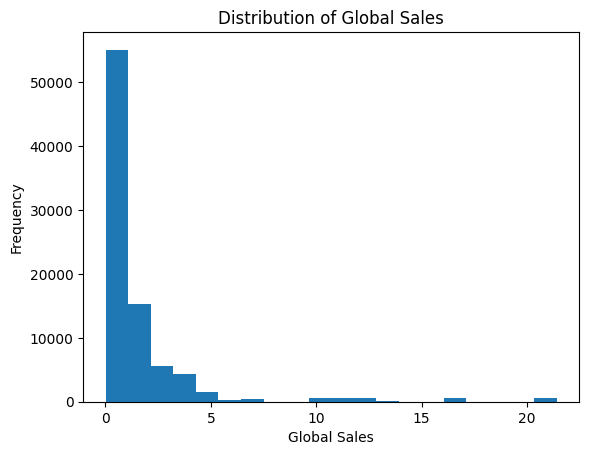

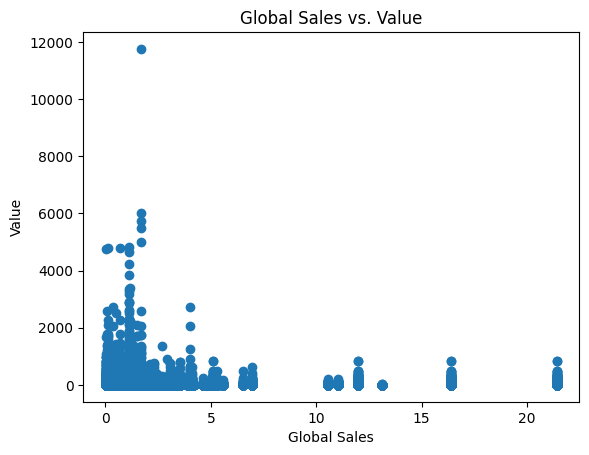

In [92]:
# Grouping and aggregation
genre_sales = merged_df.groupBy("Genre").sum("Global_Sales").orderBy("sum(Global_Sales)", ascending=False)
genre_sales.show()

# Distribution of Global Sales
global_sales_values = merged_df.select("Global_Sales").rdd.flatMap(lambda x: x).collect()
plt.hist(global_sales_values, bins=20)
plt.xlabel("Global Sales")
plt.ylabel("Frequency")
plt.title("Distribution of Global Sales")
plt.show()

# Scatter plot of Global Sales vs. Value
sales_value_df = merged_df.select("Global_Sales", "value").toPandas()
plt.scatter(sales_value_df["Global_Sales"], sales_value_df["value"])
plt.xlabel("Global Sales")
plt.ylabel("Value")
plt.title("Global Sales vs. Value")
plt.show()

Observations:


- Genre-wise Sales:
  - Action video games are most sold games globally followed by shooter videi games.

- Distribution of Global Sales:
  - The histogram shows that the majority of the games have global sales values between 0 and 2 million units. There is a long tail on the right side of the distribution, indicating a few games with significantly higher global sales.

- Global Sales vs. Value:
  - The scatter plot demonstrates a positive relationship between global sales and value. As the global sales increase, the corresponding value tends to be higher. However, there is still considerable variation in value for games with similar global sales, suggesting that other factors may influence the value metric.


<Figure size 1000x600 with 0 Axes>

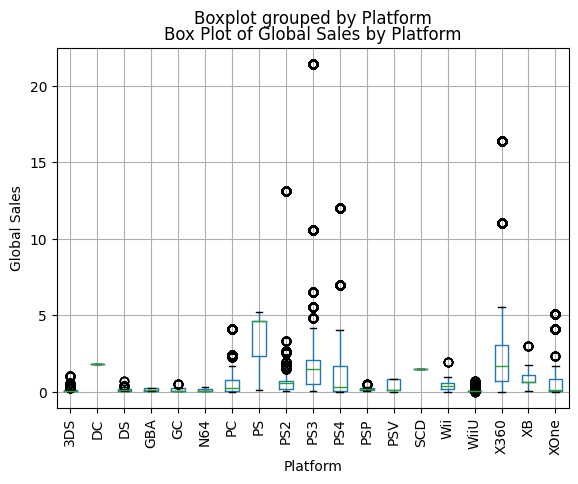

In [93]:
 # Box plot of Global Sales by Platform
plt.figure(figsize=(10, 6))
merged_df.select("Platform", "Global_Sales").toPandas().boxplot(column="Global_Sales", by="Platform")
plt.xlabel("Platform")
plt.ylabel("Global Sales")
plt.title("Box Plot of Global Sales by Platform")
plt.xticks(rotation=90)
plt.show()

Observations:

- Variation in Global Sales:
  - The box plot reveals that different gaming platforms exhibit varying levels of global sales, with some platforms having a wider range and higher median sales compared to others. It suggests that platform choice can impact the overall sales performance of games.

- Outliers:
  - The presence of outliers in the box plot indicates exceptional cases where certain platforms have achieved significantly higher global sales compared to the majority. These outliers may represent platforms with a strong user base or successful game titles that have garnered exceptional sales figures.

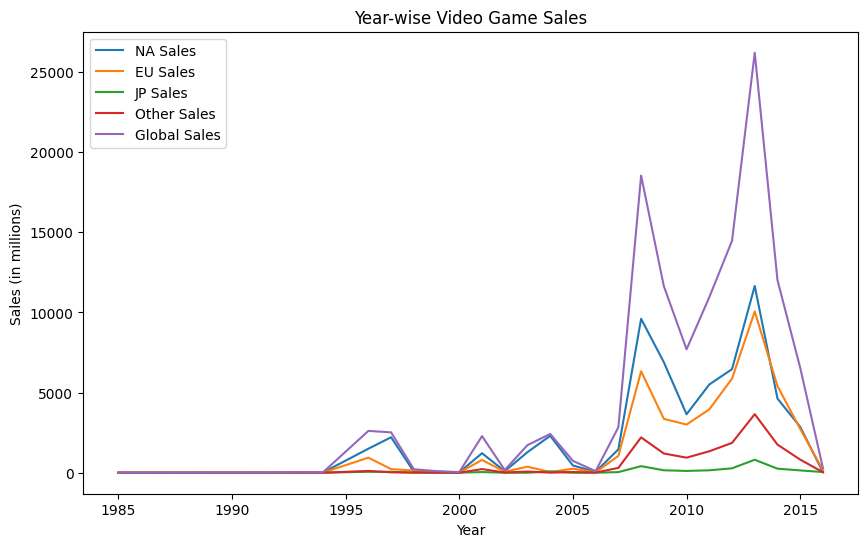

In [94]:
# Import required libraries
import matplotlib.pyplot as plt

# Group the data by year and sum the sales for each region
yearly_sales = merged_df.groupBy("Year").sum("NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales").orderBy("Year")

# Convert the Spark DataFrame to Pandas DataFrame for plotting
yearly_sales_pandas = yearly_sales.toPandas()

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales_pandas["Year"], yearly_sales_pandas["sum(NA_Sales)"], label="NA Sales")
plt.plot(yearly_sales_pandas["Year"], yearly_sales_pandas["sum(EU_Sales)"], label="EU Sales")
plt.plot(yearly_sales_pandas["Year"], yearly_sales_pandas["sum(JP_Sales)"], label="JP Sales")
plt.plot(yearly_sales_pandas["Year"], yearly_sales_pandas["sum(Other_Sales)"], label="Other Sales")
plt.plot(yearly_sales_pandas["Year"], yearly_sales_pandas["sum(Global_Sales)"], label="Global Sales")
plt.xlabel("Year")
plt.ylabel("Sales (in millions)")
plt.title("Year-wise Video Game Sales")
plt.legend()
plt.show()


Observations:

- The line graph shows a general increasing trend in video game sales across all regions (NA, EU, JP, and Global) over the years, indicating a growing market.
- NA Sales and Global Sales exhibit higher sales figures compared to EU Sales and JP Sales, suggesting a potentially larger market and demand in those regions.

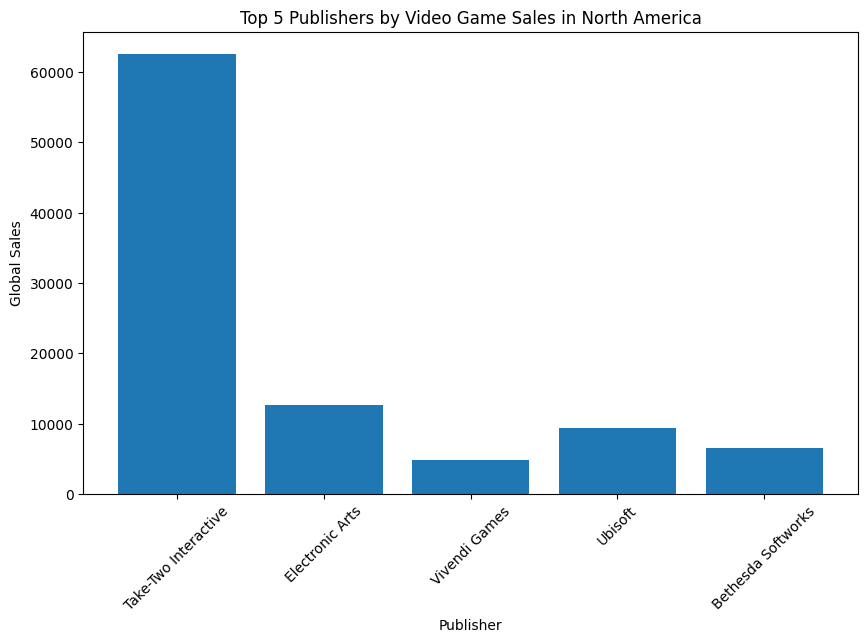

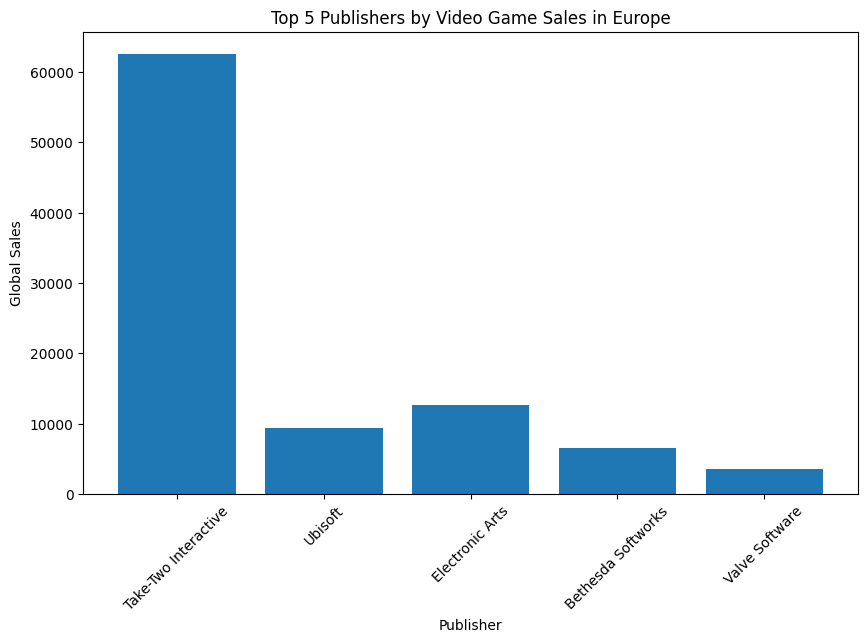

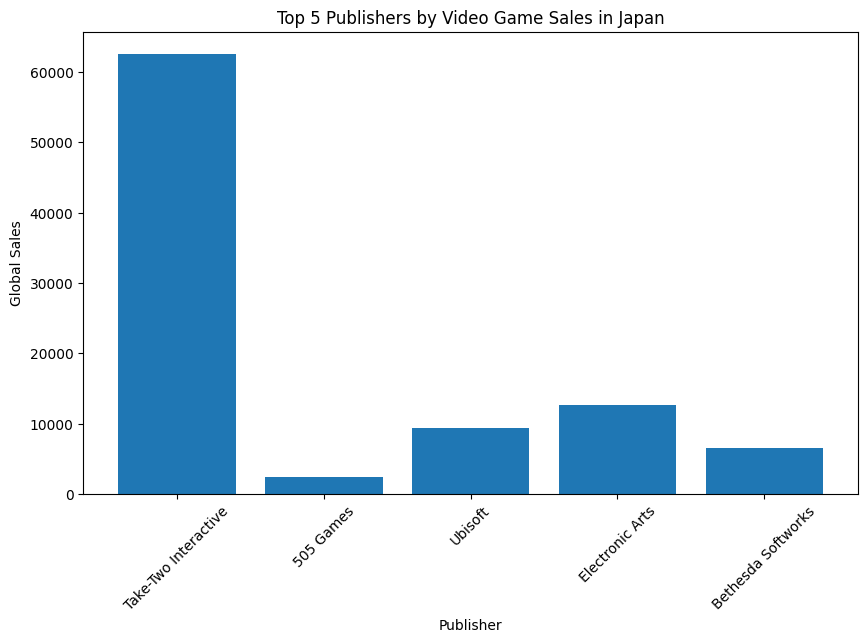

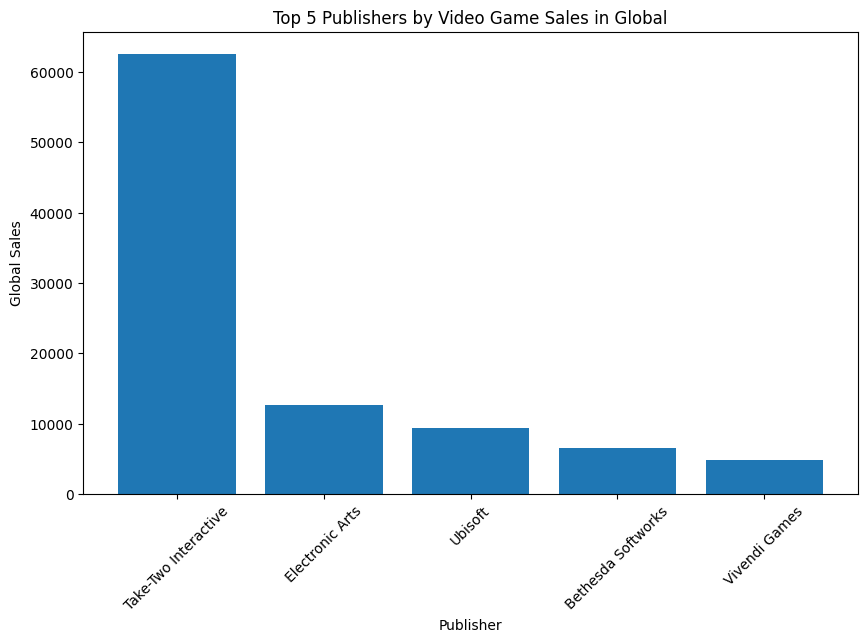

In [95]:
# Import required libraries
import matplotlib.pyplot as plt

# Function to plot the bar graph
def plot_bar_graph(dataframe, region):
    publishers = dataframe.select("Publisher").toPandas()["Publisher"]
    sales = dataframe.select("sum(Global_Sales)").toPandas()["sum(Global_Sales)"]

    plt.figure(figsize=(10, 6))
    plt.bar(publishers, sales)
    plt.xlabel("Publisher")
    plt.ylabel("Global Sales")
    plt.title(f"Top 5 Publishers by Video Game Sales in {region}")
    plt.xticks(rotation=45)
    plt.show()

# Plot the bar graph for each region
plot_bar_graph(na_top_publishers, "North America")
plot_bar_graph(eu_top_publishers, "Europe")
plot_bar_graph(jp_top_publishers, "Japan")
plot_bar_graph(global_top_publishers, "Global")


Observations:

- Top 5 Publishers by Video Game Sales (NA):
  - In North America, Take-Two Interactive, Electronic Arts, Ubisoft, Bethesda Softworks, and Vivendi Games are all, in descending order, having high game sales.

  - The analysis reveals the publishers that have achieved the highest sales in the North American region. These publishers may have a strong presence and successful games in the NA market.
- Top 5 Publishers by Video Game Sales (EU):
  - In Europe, Take-Two Interactive, Electronic Arts, Ubisoft, Bethesda Softworks, and Valve Software are all, in descending order, having high game sales.
  - The results highlight the publishers that have recorded the highest sales figures in the European market. It provides insights into the publishers that have gained significant popularity and market share in the EU region.
- Top 5 Publishers by Video Game Sales (JP):
  - In Japan, Take-Two Interactive, Electronic Arts, Ubisoft, Bethesda Softworks, and 505 Games are all, in descending order, having high game sales.
  - This analysis showcases the publishers with the highest sales in the Japanese market. It sheds light on the publishers that have successfully catered to the preferences and demands of the Japanese gaming audience.
- Top 5 Publishers by Video Game Sales (Global):
  - Globally, Take-Two Interactive, Electronic Arts, Ubisoft, Bethesda Softworks, and Vivendi Games are all, in descending order, having high game sales.
  - The global analysis identifies the publishers that have achieved the highest sales worldwide. It offers a comprehensive view of the publishers with widespread popularity and successful games across multiple regions.

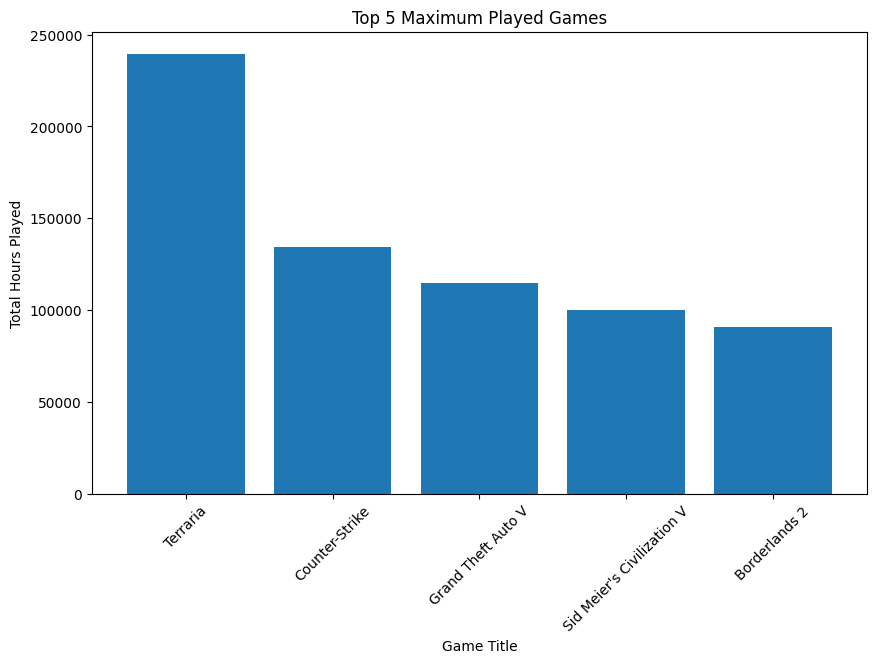

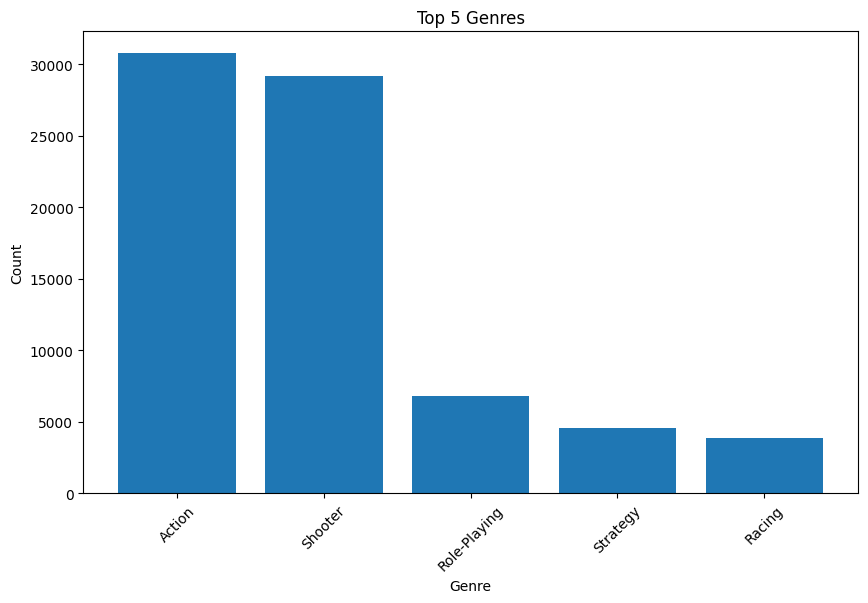

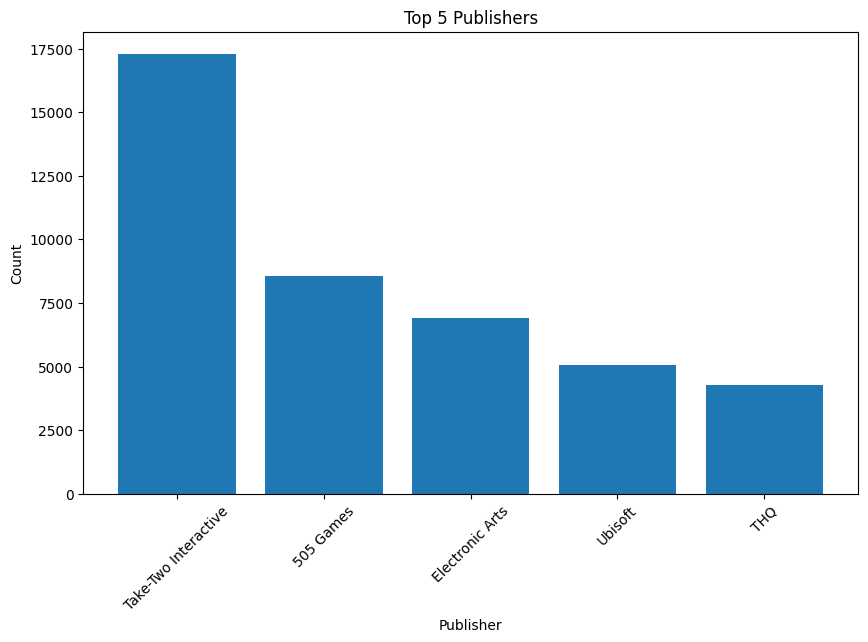

In [96]:
## Top 5 games, top 5 genre and top 5 publishers by maximum timeplayed games

# Importing necessary libraries
import matplotlib.pyplot as plt

# Top 5 Maximum Played Games
top_played_games = merged_df.filter(merged_df['behavior-name'] == 'play') \
                            .groupBy('game-title') \
                            .sum('value') \
                            .orderBy('sum(value)', ascending=False) \
                            .limit(5)

top_played_games_pandas = top_played_games.toPandas()

plt.figure(figsize=(10, 6))
plt.bar(top_played_games_pandas['game-title'], top_played_games_pandas['sum(value)'])
plt.xlabel('Game Title')
plt.ylabel('Total Hours Played')
plt.title('Top 5 Maximum Played Games')
plt.xticks(rotation=45)
plt.show()


# Top 5 Genres
top_genres = merged_df.groupBy('Genre').count().orderBy('count', ascending=False).limit(5)

top_genres_pandas = top_genres.toPandas()

plt.figure(figsize=(10, 6))
plt.bar(top_genres_pandas['Genre'], top_genres_pandas['count'])
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 5 Genres')
plt.xticks(rotation=45)
plt.show()


# Top 5 Publishers
top_publishers = merged_df.groupBy('Publisher').count().orderBy('count', ascending=False).limit(5)

top_publishers_pandas = top_publishers.toPandas()

plt.figure(figsize=(10, 6))
plt.bar(top_publishers_pandas['Publisher'], top_publishers_pandas['count'])
plt.xlabel('Publisher')
plt.ylabel('Count')
plt.title('Top 5 Publishers')
plt.xticks(rotation=45)
plt.show()


- The top 5 games most played are Terraria, Counter-Strike, Grand Theft Auto V, Sid Meier's Civilization V, and Boarderlands 2.
- The top 5 genres in which most games are played are Action, Shooter, Role Playing, Strategy, and Racing.
- The top 5 publishers for which most games are played are Take-Two Interactive, 505 Games, Electronic Arts, Ubisoft, and THQ.

<ipython-input-97-166da5f4a88d>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.toPandas().corr()


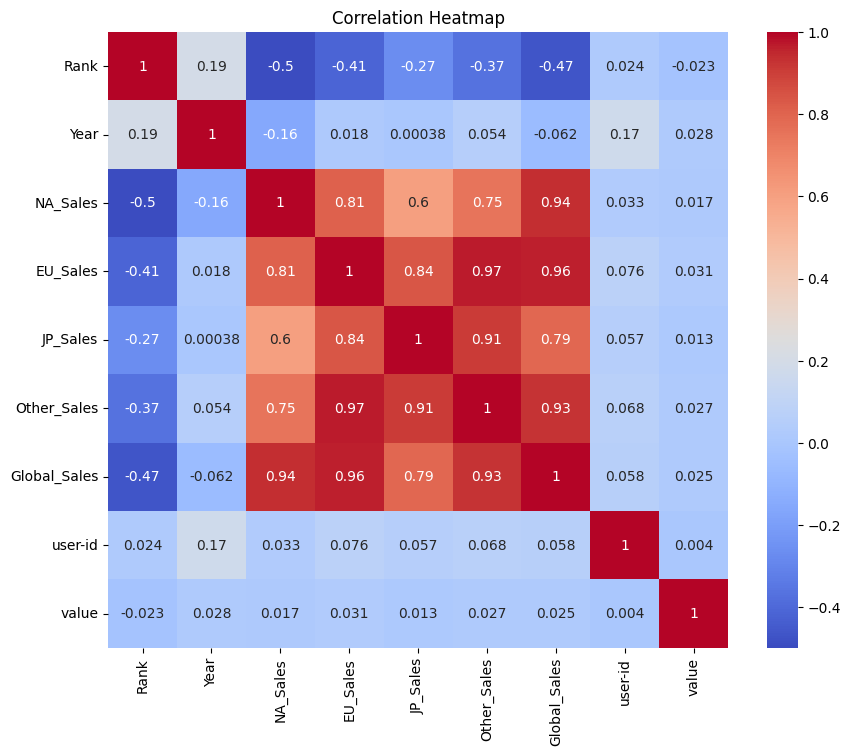

In [97]:
## Cehcking correlation

# Importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = merged_df.toPandas().corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()


- The variables NA_Sales, EU_Sales, JP_Sales, Other_Sales, and Global_Sales are positively correlated with Rank, indicating that higher-ranked games tend to have higher sales in different regions.
- There is a weak negative correlation between Year and Rank, indicating that as the year increases, the ranking of games tends to decrease. That means after some years people tend to move to new games and popularity of previous game decreases.
- There is a weak positive correlation between the Global Sales of video games and the number of Viewers. This suggests that as the viewership increases, there is a slight tendency for the global sales of video games to increase as well. However, the correlation is relatively low, indicating that there are other factors influencing video game sales apart from viewership.

# Thank You.